C:\Users\黄星皓\AppData\Local\Temp\ipykernel_25812\2950238141.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Model', y='MAPE', data=plot_data,


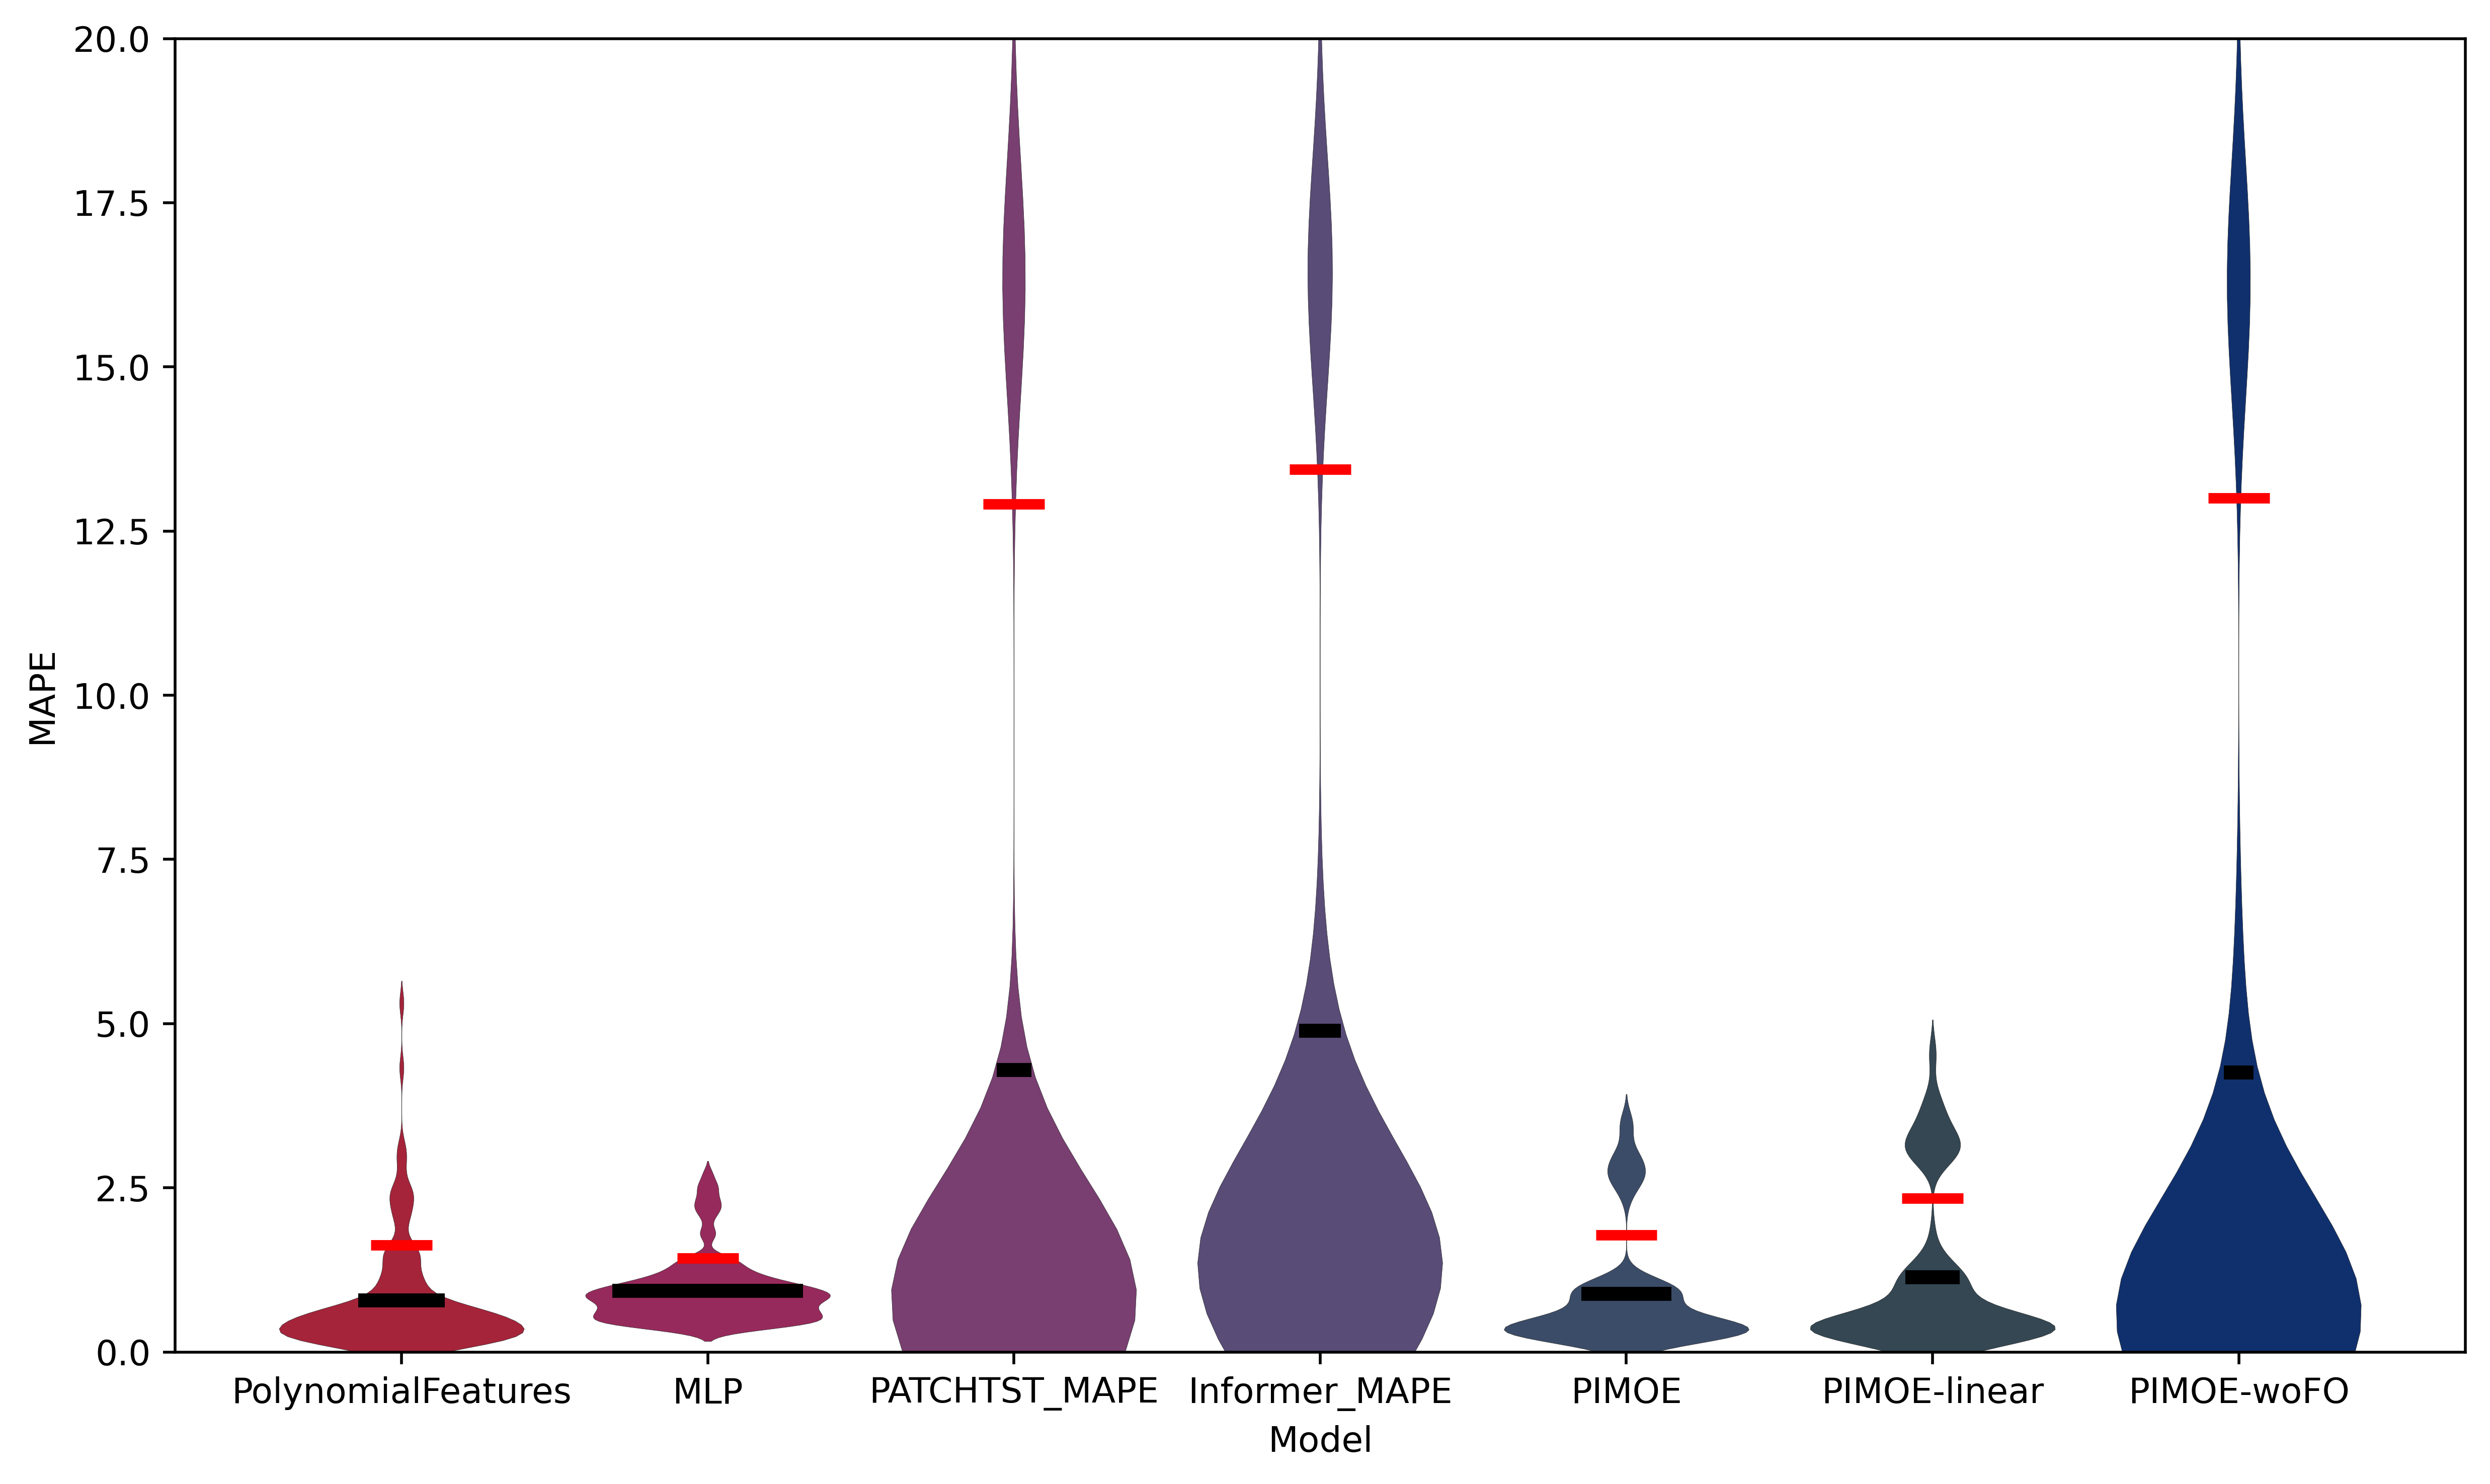

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib

input_csv = r'D:\Gitload\PIMOE\Fig 5a\fig5a.csv'
output_dir = r'D:\Gitload\Apretrain degradation\results'
os.makedirs(output_dir, exist_ok=True)

def plot_violin_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    df_clean = df.apply(lambda x: x.dropna().reset_index(drop=True), axis=0)
    
    plt.figure(figsize=(10, 6), dpi=500, facecolor='none')
    ax = plt.gca()
    
    custom_palette = [
        '#bb0e2c', '#a9185b', '#833578', 
        '#56457e', '#334a70', '#2f4858', '#002c7c'
    ]
    palette = [custom_palette[i % len(custom_palette)] for i in range(len(df.columns))]
    
    plot_data = pd.melt(df_clean, var_name='Model', value_name='MAPE')
    
    sns.violinplot(x='Model', y='MAPE', data=plot_data,
                palette=palette,
                inner=None,
                cut=2,
                bw_method=0.2,
                linewidth=0.1,
                ax=ax)

    for i, violin in enumerate(ax.collections):
        if isinstance(violin, matplotlib.collections.PolyCollection):
            paths = violin.get_paths()
            if paths:
                path = paths[0]
                vertices = path.vertices
                col = df_clean.columns[i]
                data = df_clean[col].dropna()
                mean = np.mean(data)
                std = np.std(data)
                y_values = vertices[:, 1]
                closest_idx = np.argmin(np.abs(y_values - mean))
                closest_y = y_values[closest_idx]
                mask = (y_values >= closest_y - 0.05) & (y_values <= closest_y + 0.05)
                x_values = vertices[mask, 0]
                
                if len(x_values) > 0:
                    x_min, x_max = np.min(x_values), np.max(x_values)
                    line_width = (x_max - x_min) * 0.8
                    ax.hlines(mean, 
                            i - line_width/2, 
                            i + line_width/2,
                            colors='black', 
                            linewidths=4,
                            linestyles='-')
                    ax.hlines([mean + std], 
                            i - 0.1, 
                            i + 0.1,
                            colors='red', 
                            linewidths=3,
                            linestyles='-')
    
    ax.set_ylim(0, 20)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_violin_from_csv(input_csv)